# Big Data Mart Sales Problem

## Big Data Mart Sales Problem
## Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectKBest, chi2

import warnings
warnings.filterwarnings("ignore")

#Loading Dataset of Train
Train=pd.read_csv("E:/Datatrained/Practice Project/Big Data Mart Sales Problem/bigdatamart_rep-master/bigdatamart_rep-master/bigdatamart_Train.csv",sep=",") #reading bigdatamart_Train.csv file
Train.head() #Looking into top 5 rows

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
Train.shape #Checking the shape of our data

(8523, 12)

In [7]:
Train.dtypes #Checking the datatype of each attribute

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

As per problem statement Target variable i.e. Item_Outlet_Sales is float64 i.e. continuous value so we'll use Regression to learn our model.

# EDA

## Univariate Analysis 

### Target Variable

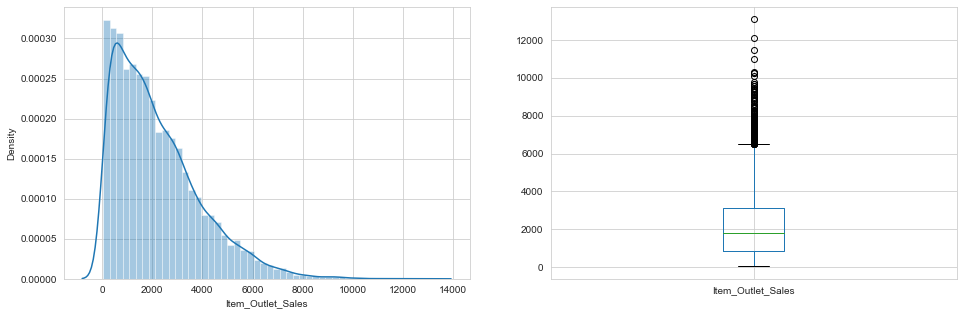

<Figure size 1440x504 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplot(121)
sns.distplot(Train['Item_Outlet_Sales'])
plt.subplot(122)
Train['Item_Outlet_Sales'].plot.box(figsize=(16,5))
sns.set_style("whitegrid")
plt.figure(figsize = (20,7))
plt.show()

Our output is right skewed and have many outliers, we'll remove it's outlier and fix the skewness.

### Categorical Visualization

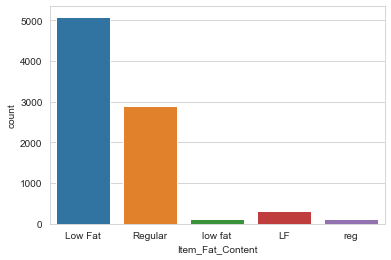

In [9]:
import seaborn as sns
ax = sns.countplot(x="Item_Fat_Content", data=Train)

Low Fat, low fat and LF all are same. 
Regular and reg both are same.

In [10]:
Train['Item_Fat_Content'].replace('Low Fat', 'Low_Fat',inplace=True)
Train['Item_Fat_Content'].replace('low fat', 'Low_Fat',inplace=True)
Train['Item_Fat_Content'].replace('LF', 'Low_Fat',inplace=True)
Train['Item_Fat_Content'].replace('reg', 'Regular',inplace=True)

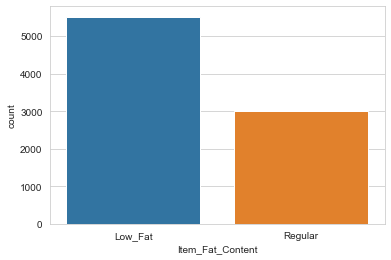

In [11]:
ax = sns.countplot(x="Item_Fat_Content", data=Train)

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

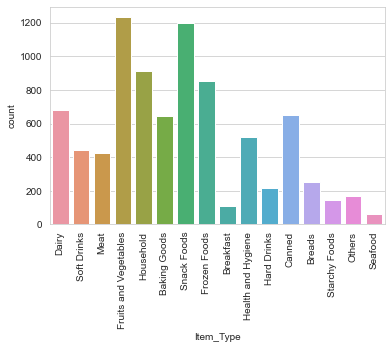

In [12]:
ax = sns.countplot(x="Item_Type", data=Train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'OUT049'),
 Text(1, 0, 'OUT018'),
 Text(2, 0, 'OUT010'),
 Text(3, 0, 'OUT013'),
 Text(4, 0, 'OUT027'),
 Text(5, 0, 'OUT045'),
 Text(6, 0, 'OUT017'),
 Text(7, 0, 'OUT046'),
 Text(8, 0, 'OUT035'),
 Text(9, 0, 'OUT019')]

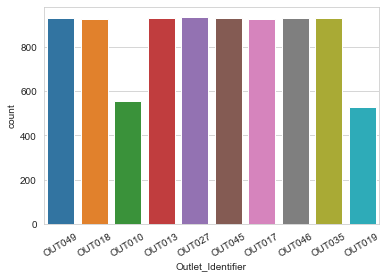

In [13]:
ax = sns.countplot(x="Outlet_Identifier", data=Train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

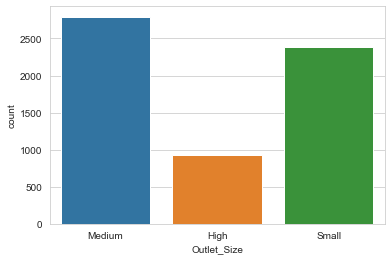

In [14]:
ax = sns.countplot(x="Outlet_Size", data=Train)

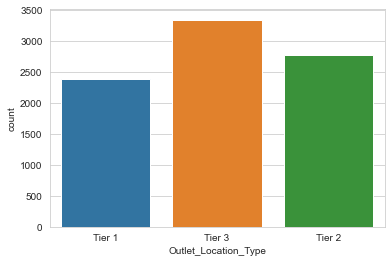

In [15]:
ax = sns.countplot(x="Outlet_Location_Type", data=Train)

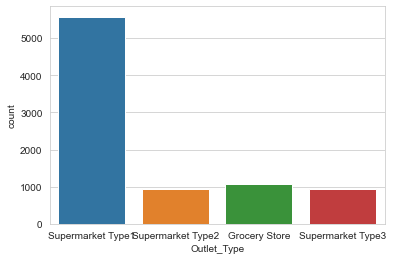

In [16]:
ax = sns.countplot(x="Outlet_Type", data=Train)

### Numerial Visualization 

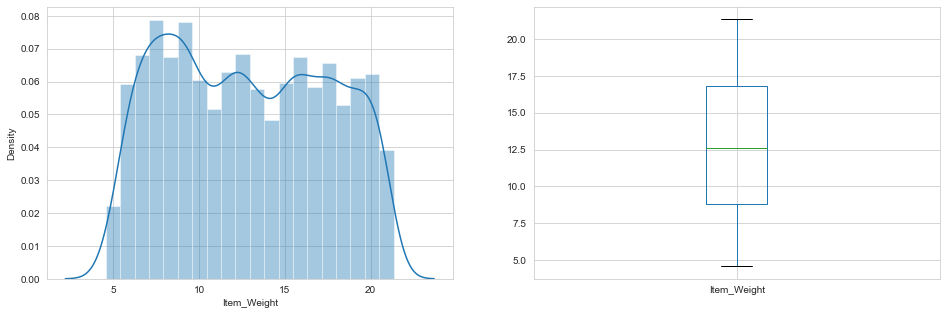

<Figure size 1440x504 with 0 Axes>

In [17]:
plt.subplot(121)
sns.distplot(Train['Item_Weight'])
plt.subplot(122)
Train['Item_Weight'].plot.box(figsize=(16,5))
sns.set_style("whitegrid")
plt.figure(figsize = (20,7))
plt.show()

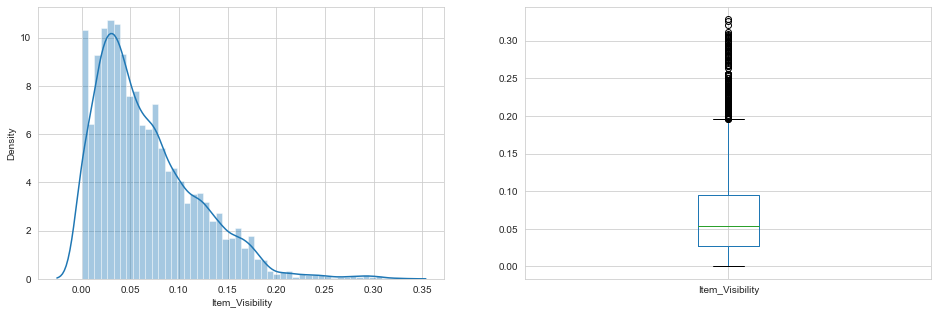

<Figure size 1440x504 with 0 Axes>

In [18]:
plt.subplot(121)
sns.distplot(Train['Item_Visibility'])
plt.subplot(122)
Train['Item_Visibility'].plot.box(figsize=(16,5))
sns.set_style("whitegrid")
plt.figure(figsize = (20,7))
plt.show()

Item_Visibility is left skewed and have outliers, we'll fix it.

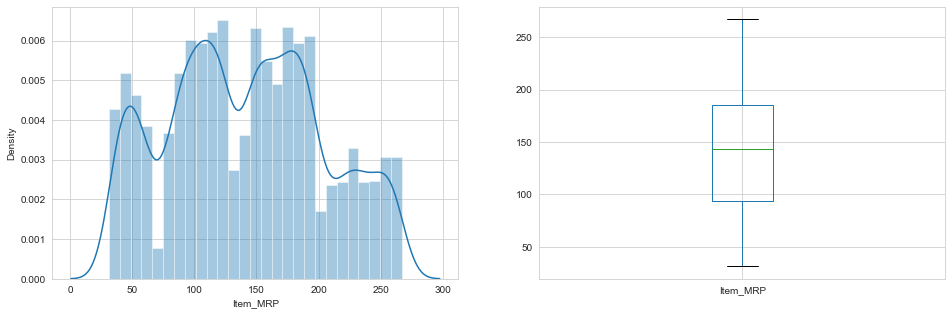

<Figure size 1440x504 with 0 Axes>

In [19]:
plt.subplot(121)
sns.distplot(Train['Item_MRP'])
plt.subplot(122)
Train['Item_MRP'].plot.box(figsize=(16,5))
sns.set_style("whitegrid")
plt.figure(figsize = (20,7))
plt.show()

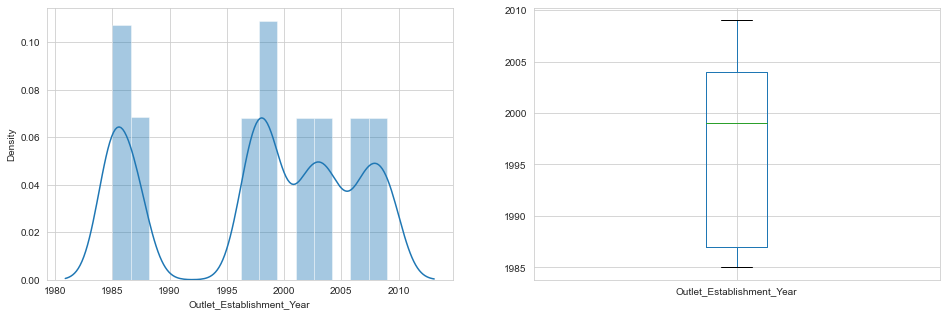

<Figure size 1440x504 with 0 Axes>

In [20]:
plt.subplot(121)
sns.distplot(Train['Outlet_Establishment_Year'])
plt.subplot(122)
Train['Outlet_Establishment_Year'].plot.box(figsize=(16,5))
sns.set_style("whitegrid")
plt.figure(figsize = (20,7))
plt.show()

## Bi-variate Analysis

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

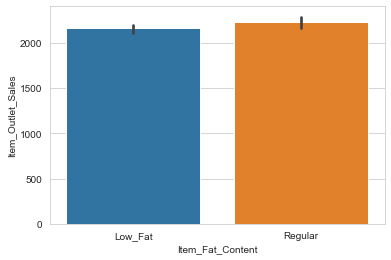

In [21]:
sns.barplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = Train)

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

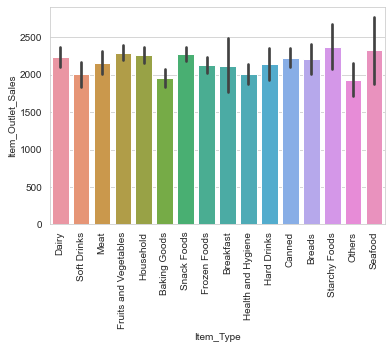

In [22]:
ax=sns.barplot(x = 'Item_Type', y = 'Item_Outlet_Sales', data = Train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'OUT049'),
 Text(1, 0, 'OUT018'),
 Text(2, 0, 'OUT010'),
 Text(3, 0, 'OUT013'),
 Text(4, 0, 'OUT027'),
 Text(5, 0, 'OUT045'),
 Text(6, 0, 'OUT017'),
 Text(7, 0, 'OUT046'),
 Text(8, 0, 'OUT035'),
 Text(9, 0, 'OUT019')]

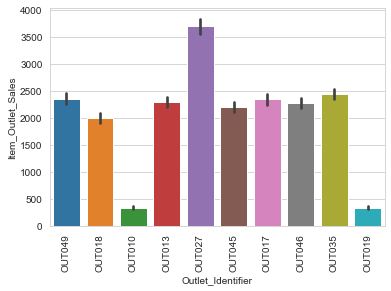

In [23]:
ax=sns.barplot(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', data = Train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

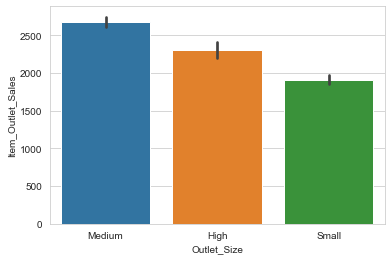

In [24]:
sns.barplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = Train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

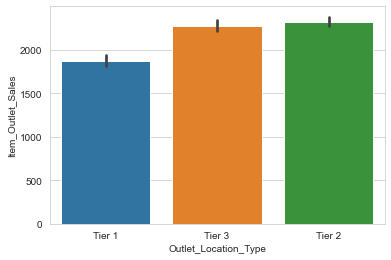

In [25]:
sns.barplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', data = Train)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

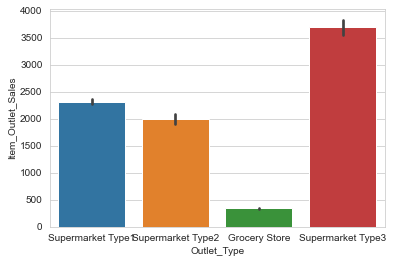

In [26]:
sns.barplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', data = Train)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

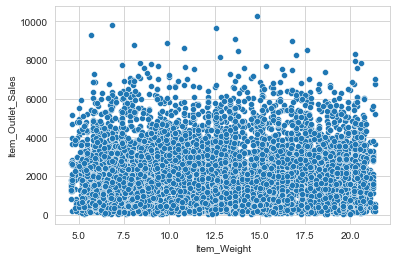

In [27]:
sns.scatterplot(x = 'Item_Weight', y = 'Item_Outlet_Sales', data = Train)

## Multi-Variate Analysis

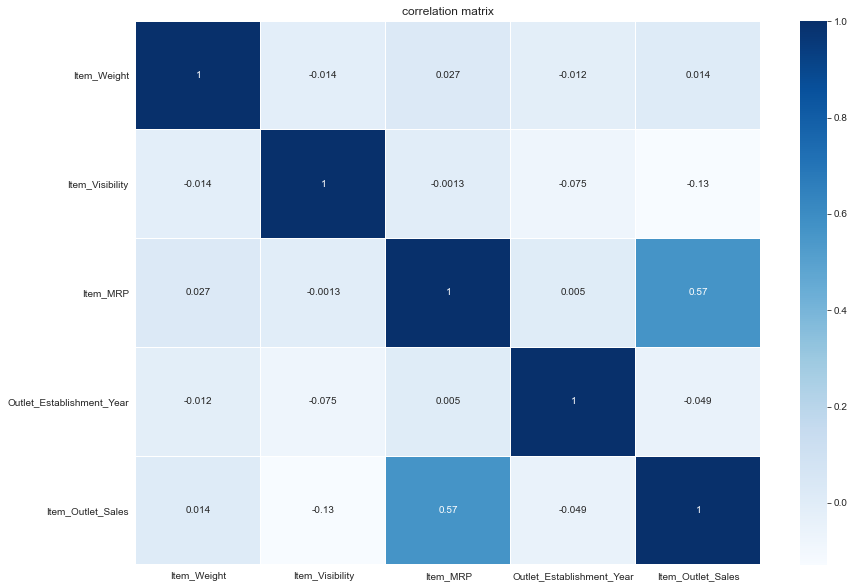

In [28]:
fig=plt.figure(figsize=(14,10))
hc=Train.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

Item_MRP is highly corelated with Item_Outlet_Sales.

# DATA CLEANING

<AxesSubplot:>

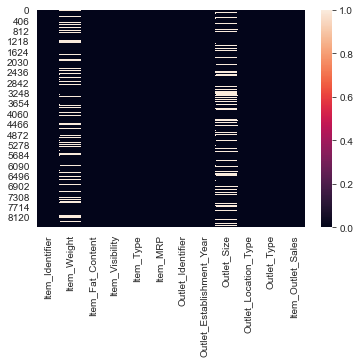

In [29]:
import seaborn as sns
sns.heatmap(Train.isnull()) #Looking for null values if any, in heatmap

Item_Weigth and Outlet_Size have lots of missing values.

In [30]:
Train['Item_Weight'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64>

In [31]:
import numpy as np
Train['Item_Weight'].replace(np.NaN,9.3,inplace=True)

In [32]:
Train['Outlet_Size'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object>

In [33]:
Train['Outlet_Size'].replace(np.NaN,'Medium',inplace=True)

<AxesSubplot:>

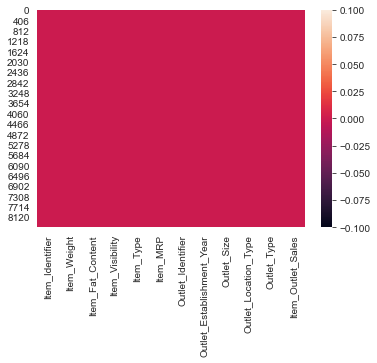

In [34]:
sns.heatmap(Train.isnull()) #Looking for null values if any, in heatmap

In [35]:
#Dropping Item_Identifier and Outlet_Identifier
Train=Train.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
Train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low_Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low_Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low_Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


# Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label_list = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in label_list:
    Train[i] = le.fit_transform(Train[i])

In [37]:
Train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [38]:
Train['Outlet_Establishment_Year'].max()

2009

In [39]:
Train['Outlet_Establishment_Year'].min()

1985

In [40]:
#Making Outlet_Establishment_Year smaller 
Train['Outlet_Establishment_Year'] = 2010 - Train['Outlet_Establishment_Year']

In [41]:
Train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,11,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,1,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,11,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,12,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,23,0,2,1,994.7052


# Removing Outliers and Skewness

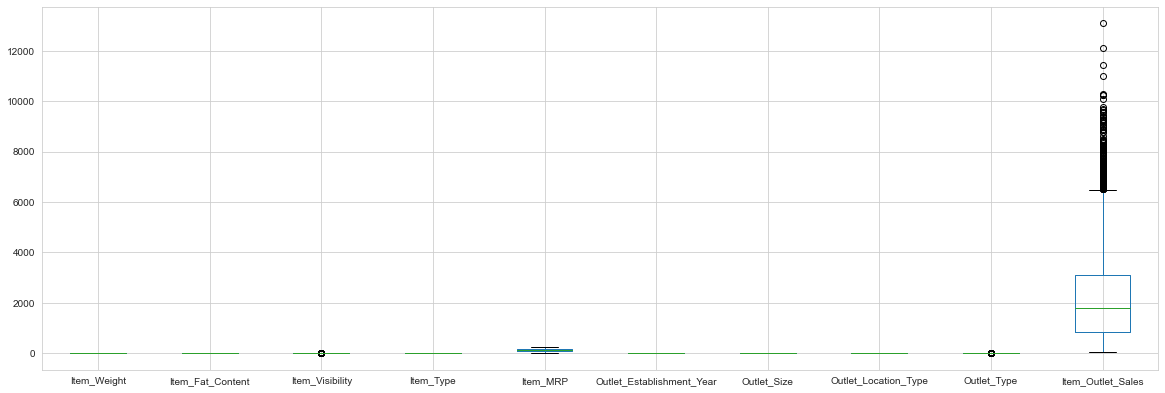

In [42]:
#Checking the outliers
Train.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [43]:
import scipy
from scipy.stats import zscore
z=np.abs(zscore(Train))
threshold=3
new_Train=Train[(z<3).all(axis=1)]
new_Train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,11,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,1,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,11,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,12,1,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,23,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,23,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,8,1,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,6,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,1,1,2,2,1845.5976


In [44]:
print(Train.shape)
print(new_Train.shape)

(8523, 10)
(8338, 10)


In [45]:
#checking for how much data we lost
loss_percent=(8523-8338)/8523*100
print(loss_percent)

2.170597207556025


We lost 2% data which is not bad.

In [46]:
new_Train.skew()

Item_Weight                  0.385568
Item_Fat_Content             0.620973
Item_Visibility              0.794272
Item_Type                    0.098295
Item_MRP                     0.138990
Outlet_Establishment_Year    0.423379
Outlet_Size                 -0.087933
Outlet_Location_Type        -0.202674
Outlet_Type                  0.956727
Item_Outlet_Sales            0.878267
dtype: float64

In [47]:
import warnings
warnings.filterwarnings('ignore')
new_Train['Item_Outlet_Sales'] = np.sqrt(new_Train['Item_Outlet_Sales'])
new_Train['Item_Visibility'] = np.sqrt(new_Train['Item_Visibility'])

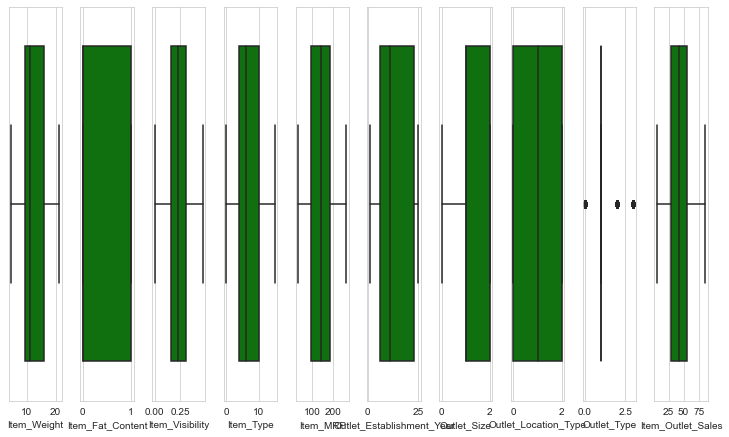

In [48]:
collist=new_Train.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(new_Train[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scale_Train=scaler.fit_transform(new_Train)
scale_Train

array([[-0.67054921, -0.73664489, -1.0017811 , ..., -1.37034498,
        -0.25983859,  1.04467073],
       [-1.43010068,  1.35750619, -0.88454741, ...,  1.09905991,
         1.02213428, -1.22876525],
       [ 1.17214963, -0.73664489, -0.97497045, ..., -1.37034498,
        -0.25983859,  0.17521964],
       ...,
       [-0.37841402, -0.73664489, -0.41501791, ..., -0.13564253,
        -0.25983859, -0.46351023],
       [-1.14021269,  1.35750619,  1.44924692, ...,  1.09905991,
         1.02213428,  0.01429311],
       [ 0.56540733, -0.73664489, -0.18123692, ..., -1.37034498,
        -0.25983859, -0.85344751]])

In [50]:
scale_Train.shape

(8338, 10)

In [51]:
#Setting up the coulumns after Scaling
scale_Train_df = pd.DataFrame(scale_Train, index=new_Train.index, columns=new_Train.columns)

In [52]:
scale_Train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.670549,-0.736645,-1.001781,-0.766589,1.771831,-0.120549,-0.278874,-1.370345,-0.259839,1.044671
1,-1.430101,1.357506,-0.884547,1.610171,-1.482939,-1.322724,-0.278874,1.099060,1.022134,-1.228765
2,1.172150,-0.736645,-0.974970,0.659467,0.024597,-0.120549,-0.278874,-1.370345,-0.259839,0.175220
3,1.554173,1.357506,-2.222264,-0.291237,0.678281,-0.000332,-0.278874,1.099060,-1.541811,-0.887966
4,-0.753695,-0.736645,-2.222264,0.421791,-1.392628,1.322060,-1.940955,1.099060,-0.259839,-0.633914


# Seperating Input and Output Variables

In [53]:
x=scale_Train_df.iloc[:,:-1]
y=scale_Train_df.iloc[:,-1:]

In [54]:
x.shape

(8338, 9)

In [55]:
y.shape

(8338, 1)

In [56]:
import numpy as np
y=np.ravel(y)

In [57]:
y.shape

(8338,)

# Finding Best Random State

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.5776313667831154  on Random_state  50


# Train Test Split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Finding Best Algorithm

In [60]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]

In [61]:
for m in model:
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print("cross validation score:  ", score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,pred)-score.mean())
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LinearRegression()
R2 Score:                 0.5776313667831154
Mean Absolute Error:      0.5174254854104775
Mean Squared error:       0.42872047717386386
Root Mean Squared Error:  0.6547674985625538
[0.56406376 0.55080514 0.52700551 0.53952842 0.54820886]
cross validation score:   0.5459223393405424
Difference between R2 score and cross validatio score is -  0.03170902744257309
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.6496661446318273
Mean Absolute Error:      0

Gradient Boosting Regressor have highest Accuracy and Cross Validation Score is also good i.e. 68% and 65%

# Hyper Parameter Tuning

In [62]:
import time
start_time = time.time()
from sklearn.model_selection import GridSearchCV
GBR=GradientBoostingRegressor()
param_grid = { 
    'loss': ['ls', 'lad', 'huber', 'quantile'],
    'n_estimators' : [5,10,20,30,40,50,100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['mse','friedman_mse']
}

clf = GridSearchCV(estimator = GBR, param_grid = param_grid, cv = 5)
clf.fit(x_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))
clf.best_params_  #Best parameters

--- 170.50957131385803 seconds ---


{'criterion': 'mse',
 'loss': 'huber',
 'max_features': 'auto',
 'n_estimators': 50}

In [63]:
clf_pred=clf.best_estimator_.predict(x_test)

In [64]:
r2_score(y_test, clf_pred)

0.6897068224796857

# Saving the model

In [65]:
import joblib
joblib.dump(clf.best_estimator_,"PJ7_Big_Mart.obj")
GBR_from_joblib=joblib.load('PJ7_Big_Mart.obj')
Predicted = GBR_from_joblib.predict(x_test)
Predicted

array([-0.26575368, -0.1308066 ,  0.55305944, ..., -0.40505955,
        0.68788798, -0.00528744])

In [66]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([GBR_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

# Loading Test Data

In [69]:
import pandas as pd
Test=pd.read_csv("E:/Datatrained/Practice Project/Big Data Mart Sales Problem/bigdatamart_rep-master/bigdatamart_rep-master/bigdatamart_Test.csv",sep=",") #reading bigdatamart_Test.csv file
Test.head() #Looking into top 5 rows

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [70]:
Test.shape #Checking the shape of our data

(5681, 11)

In [71]:
Test.dtypes #Checking the datatype of each attribute

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

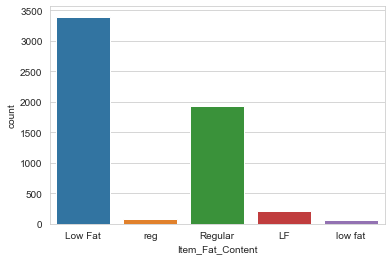

In [72]:
ax = sns.countplot(x="Item_Fat_Content", data=Test)

In [73]:
Test['Item_Fat_Content'].replace('Low Fat', 'Low_Fat',inplace=True)
Test['Item_Fat_Content'].replace('low fat', 'Low_Fat',inplace=True)
Test['Item_Fat_Content'].replace('LF', 'Low_Fat',inplace=True)
Test['Item_Fat_Content'].replace('reg', 'Regular',inplace=True)

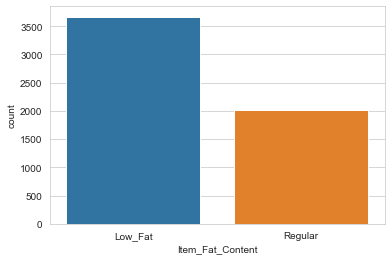

In [74]:
ax = sns.countplot(x="Item_Fat_Content", data=Test)

<AxesSubplot:>

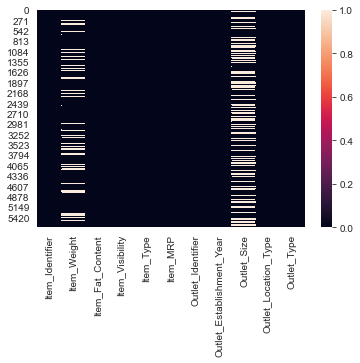

In [75]:
sns.heatmap(Test.isnull()) #Looking for null values if any, in heatmap

In [76]:
Test['Item_Weight'].replace(np.NaN,9.3,inplace=True)

In [77]:
Test['Outlet_Size'].replace(np.NaN,'Medium',inplace=True)

<AxesSubplot:>

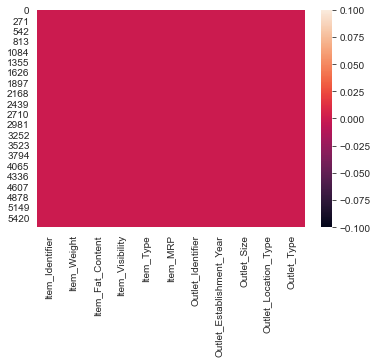

In [78]:
sns.heatmap(Test.isnull()) #Looking for null values if any, in heatmap

In [79]:
Test=Test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [80]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label_list = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in label_list:
    Test[i] = le.fit_transform(Test[i])

In [81]:
Test['Outlet_Establishment_Year'] = 2010 - Test['Outlet_Establishment_Year']

In [82]:
Test.skew()

Item_Weight                  0.445224
Item_Fat_Content             0.609223
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Establishment_Year    0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

In [83]:
z=np.abs(zscore(Test))
threshold=3
new_Test=Test[(z<3).all(axis=1)]

In [84]:
print(Test.shape)
print(new_Test.shape)

(5681, 9)
(5600, 9)


In [85]:
#checking for how much data we lost
loss_percent=(5681-5600)/5681*100
print(loss_percent)

1.425805315965499


In [86]:
new_Test.skew()

Item_Weight                  0.433379
Item_Fat_Content             0.616007
Item_Visibility              0.787861
Item_Type                    0.091394
Item_MRP                     0.133061
Outlet_Establishment_Year    0.411451
Outlet_Size                 -0.082542
Outlet_Location_Type        -0.212992
Outlet_Type                  0.953152
dtype: float64

In [87]:
new_Test['Item_Visibility'] = np.sqrt(new_Test['Item_Visibility'])

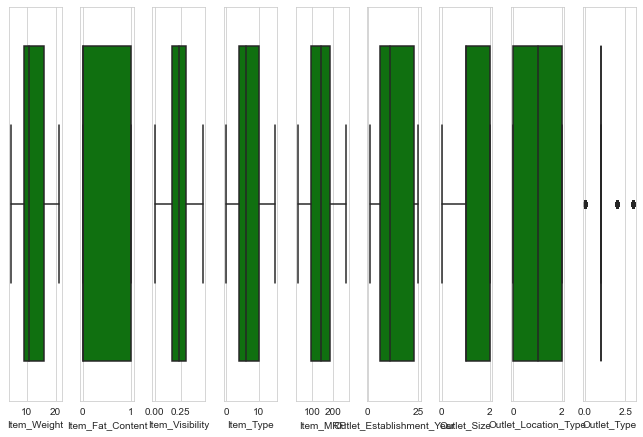

In [88]:
collist=new_Test.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(new_Test[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [89]:
scaler=StandardScaler()
scale_Test=scaler.fit_transform(new_Test)
scale_Test

array([[ 1.937676  , -0.73841307, -1.39322311, ..., -0.2761756 ,
        -1.37786207, -0.27721336],
       [-0.86265497,  1.35425555, -0.32425708, ..., -0.2761756 ,
        -0.14250703, -0.27721336],
       [ 0.55437998, -0.73841307,  0.84735181, ..., -0.2761756 ,
         1.09284802, -1.54447443],
       ...,
       [-0.48028046, -0.73841307,  0.4121988 , ..., -0.2761756 ,
        -0.14250703, -0.27721336],
       [ 0.71182831,  1.35425555, -2.24577963, ..., -0.2761756 ,
        -0.14250703, -0.27721336],
       [-0.59274355,  1.35425555,  0.92625959, ..., -0.2761756 ,
        -0.14250703, -0.27721336]])

In [90]:
scale_Test_df = pd.DataFrame(scale_Test, index=new_Test.index, columns=new_Test.columns)
scale_Test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.937676,-0.738413,-1.393223,1.363909,-0.538563,-0.128501,-0.276176,-1.377862,-0.277213
1,-0.862655,1.354256,-0.324257,-0.767463,-0.871149,-1.085897,-0.276176,-0.142507,-0.277213
2,0.554380,-0.738413,0.847352,0.890271,1.629171,-0.008826,-0.276176,1.092848,-1.544474
3,-1.084207,-0.738413,-1.029817,1.363909,0.225158,-1.085897,-0.276176,-0.142507,-0.277213
4,-0.637729,1.354256,1.129926,-0.767463,1.507359,1.546944,-0.276176,1.092848,2.257309


In [91]:
Predict_Test = GBR_from_joblib.predict(scale_Test_df)
Predict_Test

array([-0.18309815, -0.34460707, -1.04717547, ...,  0.03829884,
        0.84384262, -0.45557095])